In [1]:
from rubin_scheduler.utils import DEFAULT_NSIDE, SURVEY_START_MJD
from rubin_scheduler.scheduler.utils import (
    CurrentAreaMap,
    Footprint,
    make_rolling_footprints,
)
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.site_models import Almanac
import numpy as np

In [2]:
# code snippet to set up baseline survey footprint.
nside = 32
survey_start_mjd = SURVEY_START_MJD 
nslice = 2
rolling_scale = 0.9 
n_cycles = 3

# Use the Almanac to find the position of the sun at the start of survey
almanac = Almanac(mjd_start=survey_start_mjd)
sun_moon_info = almanac.get_sun_moon_positions(survey_start_mjd)
sun_ra_start = sun_moon_info["sun_RA"].copy()


sky = CurrentAreaMap(nside=nside)
footprints_hp_array, labels = sky.return_maps()

wfd_indx = np.where((labels == "lowdust") | (labels == "virgo"))[0]
wfd_footprint = footprints_hp_array["r"] * 0
wfd_footprint[wfd_indx] = 1

footprints_hp = {}
for key in footprints_hp_array.dtype.names:
    footprints_hp[key] = footprints_hp_array[key]

footprints = make_rolling_footprints(
        fp_hp=footprints_hp,
        mjd_start=survey_start_mjd,
        sun_ra_start=sun_ra_start,
        nslice=nslice,
        scale=rolling_scale,
        nside=nside,
        wfd_indx=wfd_indx,
        order_roll=1,
        n_cycles=n_cycles,
        uniform=True,
    )

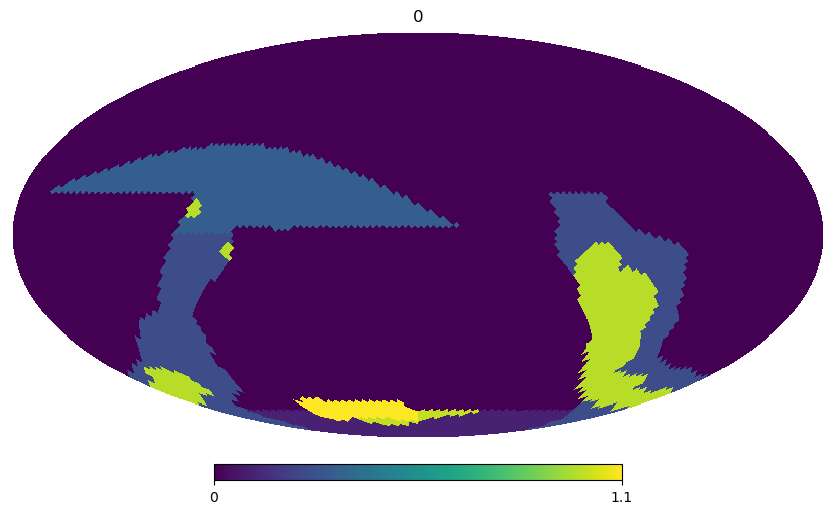

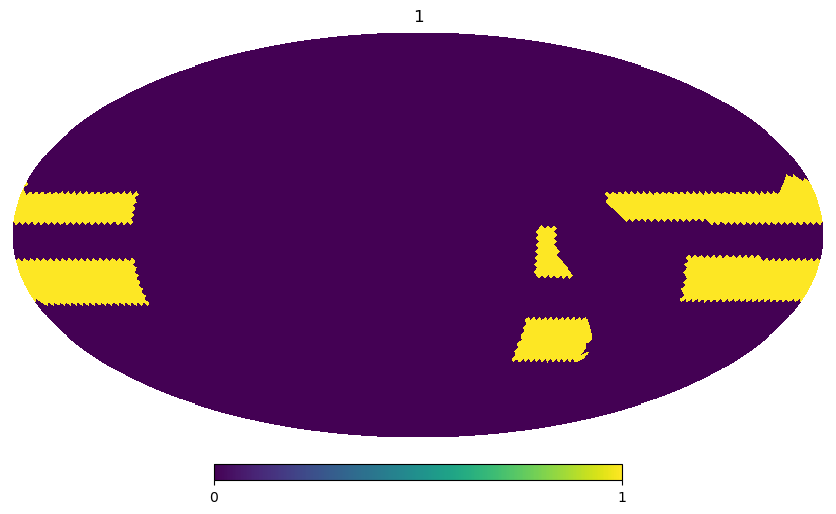

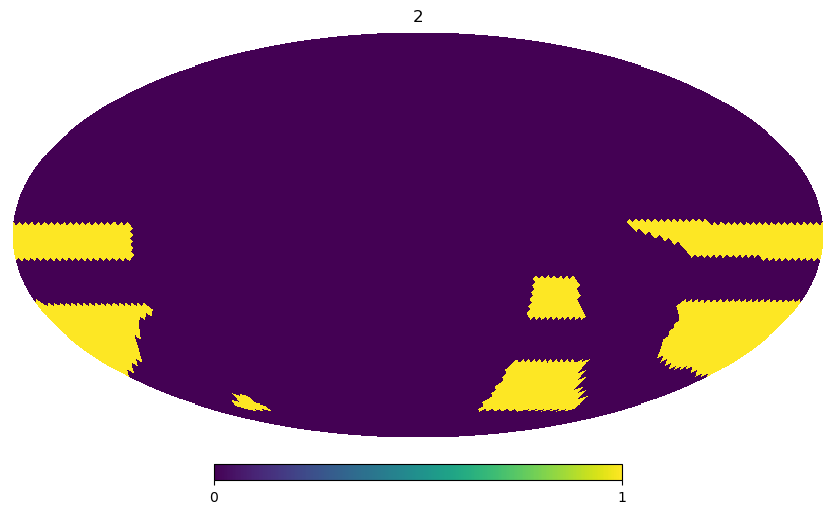

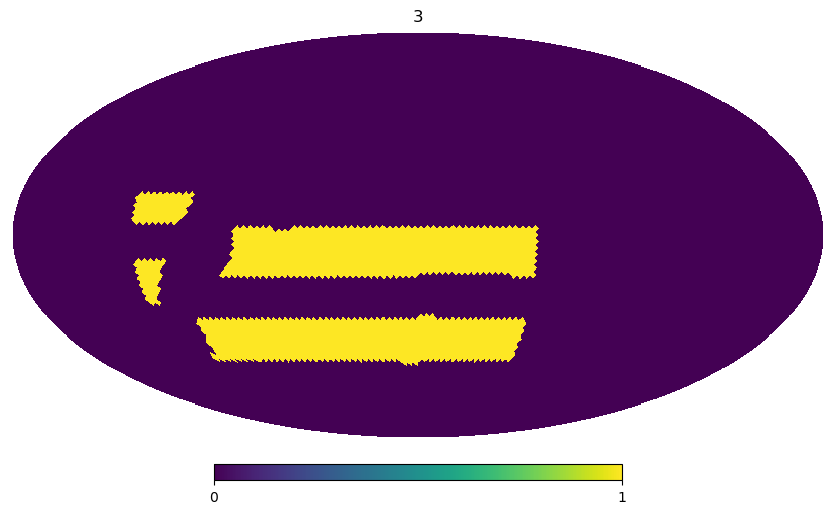

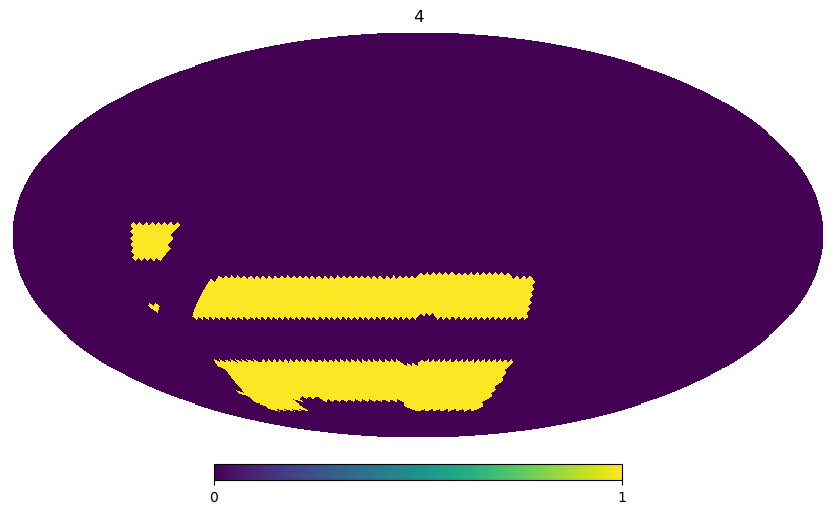

In [3]:
for i, footprint in enumerate(footprints.footprint_list):
    # Using index 2 for r band.
    hp.mollview(footprint.footprints[2,:], title=i)